In [2]:
import pandas as pd
import numpy as np
import scipy as sp

from numpy.testing import rundocs
import matplotlib.pyplot as plt
#import talib
import random
import sklearn
from sklearn import preprocessing
import tensorflow
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import seaborn as sns
import csv
#from datetime import strptime

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
#df = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Sheet1')
#df.head(76)
df = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost3')
df.head(10)

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Stybarrow Venture MV16,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,...,87500.0000,2,3,FPSO,825,2,0.914286,4,-0.143875,0.270000
1,Kizomba B,AFRICA,3,IOC,2,1,4756,EPC,1071,0.760000,...,316666.6670,6,1,FPSO,1250,5,0.789474,2,-0.140056,0.133333
2,Kizomba B Wellhead TLP,AFRICA,3,IOC,2,1,4756,EPC,1071,0.600000,...,250000.0000,6,1,TLP,1250,5,1.000000,2,-0.140056,0.133333
3,Olympus TLP,GOM,1,IOC,2,1,7729,EPC,1202,3.000000,...,116666.6670,3,2,TLP,945,5,0.857143,5,-0.125624,0.000000
4,Norne,NE,3,OC,2,1,1551,EPC,1334,4.700000,...,261666.6670,6,4,FPSO,380,3,0.840764,2,-0.125187,0.600000
5,Stampede TLP,GOM,1,OC,2,1,8523,EPC,1982,6.200000,...,86666.6667,2,1,TLP,1160,4,0.923077,5,-0.122099,-0.129032
6,Mondo,AFRICA,4,IOC,1,1,5866,EPC,797,0.750000,...,115833.3330,3,1,FPSO,728,3,0.863309,3,-0.101631,0.000000
7,Heidelberg Spar,GOM,1,OC,2,1,8018,EPC,1649,6.745000,...,93333.3333,2,4,SPAR,1620,5,0.857143,5,-0.095816,0.008154
8,Mars TLP,GOM,1,IOC,2,1,1381,EPC,1098,1.200000,...,230833.3330,5,2,TLP,896,4,0.866426,4,-0.090164,-0.054167
9,Shenzi TLP,GOM,2,OC,2,1,6001,EPC,1119,4.410000,...,116666.6670,3,2,TLP,1333,2,0.857143,5,-0.088472,0.000000


In [5]:
print('mean', df['Schedule_Overrun'].mean())
print('median',df['Schedule_Overrun'].median())
print('max',df['Schedule_Overrun'].max())
print('min',df['Schedule_Overrun'].min())
print('std',df['Schedule_Overrun'].std())
Std3_9 =  3.9*df['Schedule_Overrun'].std()
Std3 =  3*df['Schedule_Overrun'].std()
Std2 =  2*df['Schedule_Overrun'].std()
print('2_std',Std2)
print('3_std',Std3)
print('3.9_std',Std3_9)
print(df.shape)
print('describe:',df.describe())

mean 0.11804587938271607
median 0.0867679
max 0.52126367
min -0.1438746
std 0.17112948447007645
2_std 0.3422589689401529
3_std 0.5133884534102293
3.9_std 0.6674049894332982
(81, 21)
describe:        Local Content Requirment (H,M,A,L, N)  Lease/ Own  Contract2  \
count                              81.000000   81.000000  81.000000   
mean                                2.901235    1.765432   1.333333   
std                                 1.496704    0.426369   0.774597   
min                                 1.000000    1.000000   0.000000   
25%                                 1.000000    2.000000   1.000000   
50%                                 3.000000    2.000000   1.000000   
75%                                 4.000000    2.000000   1.000000   
max                                 5.000000    2.000000   3.000000   

       Contracting Date  Planned_Duration  Planned_Cost        BOE/day  \
count         81.000000         81.000000     81.000000      81.000000   
mean        5543.370

In [6]:
#df[df["Cost_Overrun"]==2.6800000000000006]
df[df["Cost_Overrun"]>Std3_9]


,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
29,Kristin,NE,4,OC,2,1,4368,EPC,1384,1.9,...,128000.0,3,5,SEMI,370,1,0.976562,2,0.023844,0.736842


In [7]:

#print(df.shape)
#df = df[df.Cost_Overrun < Std3_9]
#print(df.shape)

In [8]:
#df.drop([df["Cost_Overrun"]==2.6800000000000006], axis =0)
#df.drop([67,67])
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())

mean 0.16348637469135802
median 0.12
max 0.73684211
min -0.1290323


In [9]:
df= df.drop('Unit Name', axis = 1)
df.head(10)

,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,NEW,87500.0000,2,3,FPSO,825,2,0.914286,4,-0.143875,0.270000
1,AFRICA,3,IOC,2,1,4756,EPC,1071,0.760000,NEW,316666.6670,6,1,FPSO,1250,5,0.789474,2,-0.140056,0.133333
2,AFRICA,3,IOC,2,1,4756,EPC,1071,0.600000,NEW,250000.0000,6,1,TLP,1250,5,1.000000,2,-0.140056,0.133333
3,GOM,1,IOC,2,1,7729,EPC,1202,3.000000,NEW,116666.6670,3,2,TLP,945,5,0.857143,5,-0.125624,0.000000
4,NE,3,OC,2,1,1551,EPC,1334,4.700000,NEW,261666.6670,6,4,FPSO,380,3,0.840764,2,-0.125187,0.600000
5,GOM,1,OC,2,1,8523,EPC,1982,6.200000,NEW,86666.6667,2,1,TLP,1160,4,0.923077,5,-0.122099,-0.129032
6,AFRICA,4,IOC,1,1,5866,EPC,797,0.750000,CONV,115833.3330,3,1,FPSO,728,3,0.863309,3,-0.101631,0.000000
7,GOM,1,OC,2,1,8018,EPC,1649,6.745000,NEW,93333.3333,2,4,SPAR,1620,5,0.857143,5,-0.095816,0.008154
8,GOM,1,IOC,2,1,1381,EPC,1098,1.200000,NEW,230833.3330,5,2,TLP,896,4,0.866426,4,-0.090164,-0.054167
9,GOM,2,OC,2,1,6001,EPC,1119,4.410000,NEW,116666.6670,3,2,TLP,1333,2,0.857143,5,-0.088472,0.000000


In [10]:
dataset = df.values
print(dataset.shape)
Y = dataset[:,19]
df= df.drop('Schedule_Overrun', axis = 1)
df= df.drop('Cost_Overrun', axis = 1)
print(Y)

(81, 20)
[0.27 0.13333333 0.13333333 0.0 0.6 -0.1290323 0.0 0.00815419 -0.0541667
 0.0 0.0 0.04344828 0.17 0.0041841 0.35 0.2 0.28571429 0.0 0.0 0.0 0.0
 0.01202795 0.13333333 0.13333333 0.14285714 0.17647059 0.0 0.08888889 0.1
 0.73684211 0.044 0.0 0.07894737 0.07692308 0.0 0.0 0.38947368 0.07816712
 0.0 0.2 0.25384615 0.0 0.33 0.0 0.04086957 0.311 0.3 0.17 0.47826087
 0.00827301 0.33333333 0.0 0.19246862 0.0 0.57 0.43487859 0.08333333 0.36
 0.47882353 0.34408602 0.25 0.38461538 0.07142857 0.00554236 0.24
 -0.0333333 0.4 0.45 0.04086957 0.0 0.14 0.32352941 0.075 0.07797271
 0.32352941 0.30769231 0.06 0.38461538 0.27552842 0.25 0.12]


In [11]:

# One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
#df.iloc[:,5:].head(5)
df.head(10)


,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_Conv,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP
0,3,1,3,5922,702,0.598425,87500.0000,2,3,825,...,0,1,0,0,0,1,0,0,0,0
1,3,2,1,4756,1071,0.760000,316666.6670,6,1,1250,...,0,1,0,0,0,1,0,0,0,0
2,3,2,1,4756,1071,0.600000,250000.0000,6,1,1250,...,0,1,0,0,0,0,0,0,0,1
3,1,2,1,7729,1202,3.000000,116666.6670,3,2,945,...,0,1,0,0,0,0,0,0,0,1
4,3,2,1,1551,1334,4.700000,261666.6670,6,4,380,...,0,1,0,0,0,1,0,0,0,0
5,1,2,1,8523,1982,6.200000,86666.6667,2,1,1160,...,0,1,0,0,0,0,0,0,0,1
6,4,1,1,5866,797,0.750000,115833.3330,3,1,728,...,0,0,0,0,0,1,0,0,0,0
7,1,2,1,8018,1649,6.745000,93333.3333,2,4,1620,...,0,1,0,0,0,0,0,0,1,0
8,1,2,1,1381,1098,1.200000,230833.3330,5,2,896,...,0,1,0,0,0,0,0,0,0,1
9,2,2,1,6001,1119,4.410000,116666.6670,3,2,1333,...,0,1,0,0,0,0,0,0,0,1


In [12]:
print(df.shape)

(81, 39)


In [13]:
df['Cost_Overrun'] = Y

print(df.shape)

(81, 40)


In [16]:
print(Y)

[0.27 0.13333333 0.13333333 0.0 0.6 -0.1290323 0.0 0.00815419 -0.0541667
 0.0 0.0 0.04344828 0.17 0.0041841 0.35 0.2 0.28571429 0.0 0.0 0.0 0.0
 0.01202795 0.13333333 0.13333333 0.14285714 0.17647059 0.0 0.08888889 0.1
 0.73684211 0.044 0.0 0.07894737 0.07692308 0.0 0.0 0.38947368 0.07816712
 0.0 0.2 0.25384615 0.0 0.33 0.0 0.04086957 0.311 0.3 0.17 0.47826087
 0.00827301 0.33333333 0.0 0.19246862 0.0 0.57 0.43487859 0.08333333 0.36
 0.47882353 0.34408602 0.25 0.38461538 0.07142857 0.00554236 0.24
 -0.0333333 0.4 0.45 0.04086957 0.0 0.14 0.32352941 0.075 0.07797271
 0.32352941 0.30769231 0.06 0.38461538 0.27552842 0.25 0.12]


In [17]:
df

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Cost_Overrun
0,3,1,3,5922,702,0.598425,87500.0000,2,3,825,...,1,0,0,0,1,0,0,0,0,0.27
1,3,2,1,4756,1071,0.760000,316666.6670,6,1,1250,...,1,0,0,0,1,0,0,0,0,0.133333
2,3,2,1,4756,1071,0.600000,250000.0000,6,1,1250,...,1,0,0,0,0,0,0,0,1,0.133333
3,1,2,1,7729,1202,3.000000,116666.6670,3,2,945,...,1,0,0,0,0,0,0,0,1,0
4,3,2,1,1551,1334,4.700000,261666.6670,6,4,380,...,1,0,0,0,1,0,0,0,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3,1,3,4189,739,0.200000,66666.6667,2,2,1710,...,1,0,0,0,0,0,0,1,0,0.06
77,5,2,1,4199,883,1.300000,185000.0000,4,3,800,...,0,0,0,0,1,0,0,0,0,0.384615
78,5,1,3,8984,831,1.000000,73333.3333,2,1,2200,...,0,0,0,0,1,0,0,0,0,0.275528
79,5,2,1,4350,259,0.400000,40000.0000,1,2,30,...,1,0,0,0,1,0,0,0,0,0.25


In [18]:
pd.to_numeric(df['Cost_Overrun'])
df['Cost_Overrun'].astype(str).astype(float)
#df['Schedule_Overrun']
df['Cost_Overrun'] = pd.to_numeric(df['Cost_Overrun'],errors='coerce')
df.dtypes['Cost_Overrun']


dtype('float64')

In [19]:
df2=df
df2

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Cost_Overrun
0,3,1,3,5922,702,0.598425,87500.0000,2,3,825,...,1,0,0,0,1,0,0,0,0,0.270000
1,3,2,1,4756,1071,0.760000,316666.6670,6,1,1250,...,1,0,0,0,1,0,0,0,0,0.133333
2,3,2,1,4756,1071,0.600000,250000.0000,6,1,1250,...,1,0,0,0,0,0,0,0,1,0.133333
3,1,2,1,7729,1202,3.000000,116666.6670,3,2,945,...,1,0,0,0,0,0,0,0,1,0.000000
4,3,2,1,1551,1334,4.700000,261666.6670,6,4,380,...,1,0,0,0,1,0,0,0,0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3,1,3,4189,739,0.200000,66666.6667,2,2,1710,...,1,0,0,0,0,0,0,1,0,0.060000
77,5,2,1,4199,883,1.300000,185000.0000,4,3,800,...,0,0,0,0,1,0,0,0,0,0.384615
78,5,1,3,8984,831,1.000000,73333.3333,2,1,2200,...,0,0,0,0,1,0,0,0,0,0.275528
79,5,2,1,4350,259,0.400000,40000.0000,1,2,30,...,1,0,0,0,1,0,0,0,0,0.250000


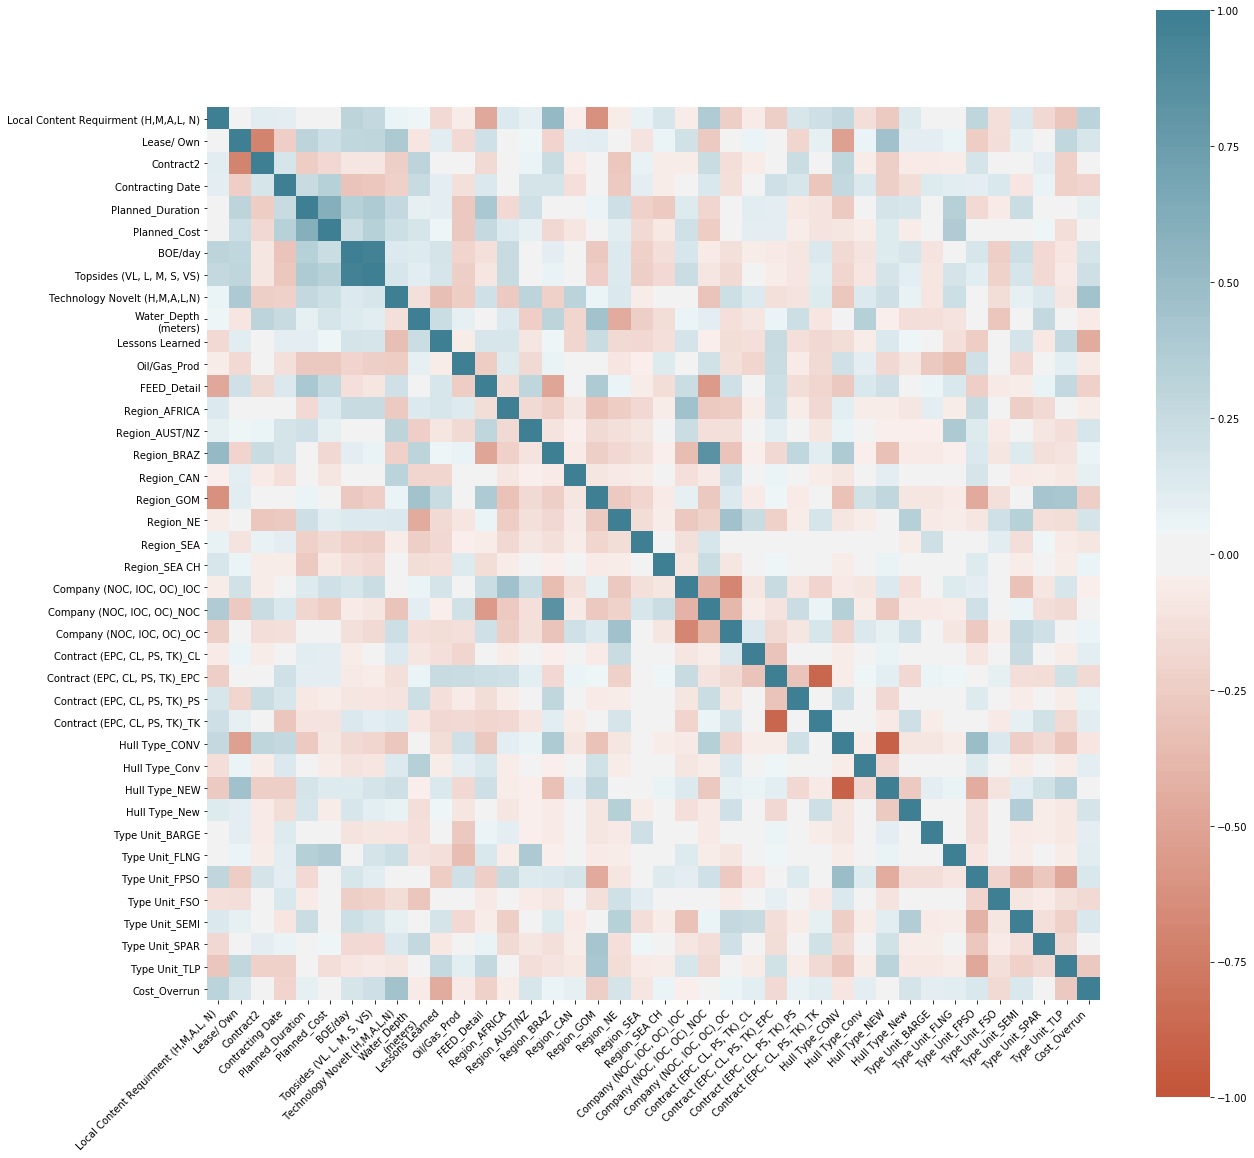

In [20]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

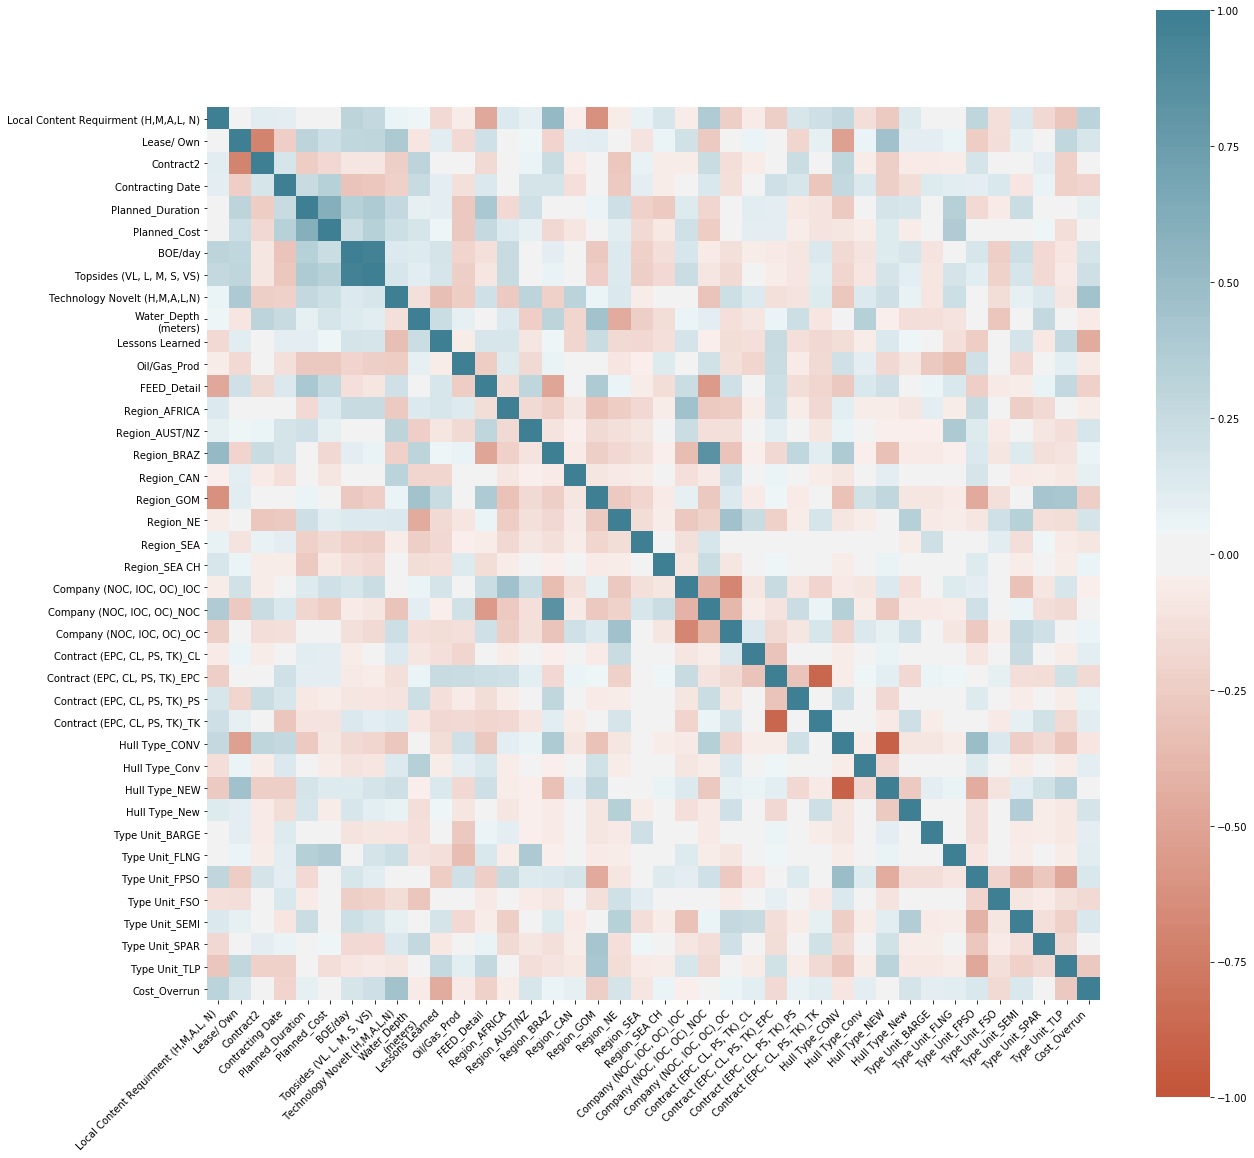

In [24]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
df.corr(method ='pearson')

,"Local Content Requirment (H,M,A,L, N)",Lease/ Own,Contract2,Contracting Date,Planned_Duration,Planned_Cost,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Water_Depth\n(meters),...,Hull Type_NEW,Hull Type_New,Type Unit_BARGE,Type Unit_FLNG,Type Unit_FPSO,Type Unit_FSO,Type Unit_SEMI,Type Unit_SPAR,Type Unit_TLP,Cost_Overrun
"Local Content Requirment (H,M,A,L, N)",1.000000,0.002418,0.115008,0.087493,0.023462,-0.017256,0.304821,0.271596,0.062260,0.042163,...,-0.264473,0.117535,0.010565,0.007424,0.294161,-0.138097,0.142092,-0.186351,-0.291891,0.320047
Lease/ Own,0.002418,1.000000,-0.706506,-0.249668,0.297169,0.221244,0.288720,0.295105,0.395672,-0.102391,...,0.448022,0.088081,0.088081,0.061892,-0.252737,-0.142774,0.083295,-0.037124,0.285309,0.160344
Contract2,0.115008,-0.706506,1.000000,0.173674,-0.253876,-0.187225,-0.087605,-0.096695,-0.229421,0.308440,...,-0.240377,-0.068897,-0.068897,-0.048412,0.182441,-0.024673,-0.014564,0.095127,-0.223170,-0.035586
Contracting Date,0.087493,-0.249668,0.173674,1.000000,0.251738,0.329736,-0.301002,-0.285285,-0.219792,0.256545,...,-0.240386,-0.152733,0.121034,0.111713,0.093568,0.149706,-0.105525,0.063039,-0.218903,-0.208314
Planned_Duration,0.023462,0.297169,-0.253876,0.251738,1.000000,0.600410,0.329110,0.387426,0.274980,0.084872,...,0.186867,0.163160,-0.036988,0.347601,-0.179459,-0.064667,0.238220,-0.019151,-0.027747,0.080805
Planned_Cost,-0.017256,0.221244,-0.187225,0.329736,0.600410,1.000000,0.237548,0.329695,0.226095,0.175489,...,0.119148,-0.047005,-0.028740,0.369598,0.030447,0.012084,-0.025860,0.046529,-0.141738,-0.019504
BOE/day,0.304821,0.288720,-0.087605,-0.301002,0.329110,0.237548,1.000000,0.956322,0.139705,0.119490,...,0.126053,0.167321,-0.113654,-0.002756,0.156875,-0.230140,0.219862,-0.176403,-0.101852,0.178362
"Topsides (VL, L, M, S, VS)",0.271596,0.295105,-0.096695,-0.285285,0.387426,0.329695,0.956322,1.000000,0.169910,0.114065,...,0.180191,0.107227,-0.098344,0.183683,0.113655,-0.214493,0.175159,-0.175908,-0.073745,0.215515
"Technology Novelt (H,M,A,L,N)",0.062260,0.395672,-0.229421,-0.219792,0.274980,0.226095,0.139705,0.169910,1.000000,-0.119131,...,0.212077,0.075428,-0.104267,0.221357,-0.013131,-0.149359,0.080659,0.145801,-0.098067,0.438383
Water_Depth\n(meters),0.042163,-0.102391,0.308440,0.256545,0.084872,0.175489,0.119490,0.114065,-0.119131,1.000000,...,-0.044211,-0.141326,-0.135230,-0.113869,-0.005995,-0.291334,0.025666,0.277247,0.030314,-0.062725


In [26]:
dataset = df.values

In [27]:
dataset


array([[3.        , 1.        , 3.        , ..., 0.        , 0.        ,
        0.27      ],
       [3.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.13333333],
       [3.        , 2.        , 1.        , ..., 0.        , 1.        ,
        0.13333333],
       ...,
       [5.        , 1.        , 3.        , ..., 0.        , 0.        ,
        0.27552842],
       [5.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.25      ],
       [4.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.12      ]])

In [30]:
X = dataset[:,0:39]

In [31]:
X

array([[3., 1., 3., ..., 0., 0., 0.],
       [3., 2., 1., ..., 0., 0., 0.],
       [3., 2., 1., ..., 0., 0., 1.],
       ...,
       [5., 1., 3., ..., 0., 0., 0.],
       [5., 2., 1., ..., 0., 0., 0.],
       [4., 2., 1., ..., 0., 0., 0.]])

In [32]:
Y = dataset[:,39]

In [33]:
Y

array([ 0.27      ,  0.13333333,  0.13333333,  0.        ,  0.6       ,
       -0.1290323 ,  0.        ,  0.00815419, -0.0541667 ,  0.        ,
        0.        ,  0.04344828,  0.17      ,  0.0041841 ,  0.35      ,
        0.2       ,  0.28571429,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01202795,  0.13333333,  0.13333333,  0.14285714,
        0.17647059,  0.        ,  0.08888889,  0.1       ,  0.73684211,
        0.044     ,  0.        ,  0.07894737,  0.07692308,  0.        ,
        0.        ,  0.38947368,  0.07816712,  0.        ,  0.2       ,
        0.25384615,  0.        ,  0.33      ,  0.        ,  0.04086957,
        0.311     ,  0.3       ,  0.17      ,  0.47826087,  0.00827301,
        0.33333333,  0.        ,  0.19246862,  0.        ,  0.57      ,
        0.43487859,  0.08333333,  0.36      ,  0.47882353,  0.34408602,
        0.25      ,  0.38461538,  0.07142857,  0.00554236,  0.24      ,
       -0.0333333 ,  0.4       ,  0.45      ,  0.04086957,  0.  

In [34]:
from sklearn import preprocessing

In [35]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [36]:
X_scale

array([[0.5       , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [37]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [38]:
#Y_scale

In [39]:
from sklearn.feature_extraction import DictVectorizer

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [127]:
print(X.shape)
print(Y.shape)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

(100, 39)
(100,)


In [128]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(70, 39) (15, 39) (15, 39) (70,) (15,) (15,)


In [129]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [130]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [131]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [132]:
for train, test in kfold.split(X_scale, Y):
# create model
	model2 = Sequential()
	model2.add(Dense(39, input_dim=39, activation='relu'))
	model2.add(Dense(78, activation='relu'))
	model2.add(Dense(39, activation='relu'))
	model2.add(Dense(7, activation='relu'))
	model2.add(Dense(1, activation='sigmoid'))
	# Compile model
	model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model2.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model2.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 18.89%
accuracy: 16.67%
accuracy: 17.78%
accuracy: 16.67%
accuracy: 18.89%
accuracy: 18.89%
accuracy: 20.00%
accuracy: 17.78%
accuracy: 18.89%
accuracy: 15.56%
18.00% (+/- 1.30%)


In [133]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model3 = Sequential([
        Dense(39, activation='sigmoid', input_shape=(39,)),
        Dense(78, activation='sigmoid'),
        Dense(39, activation='sigmoid'),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model3.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model3.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model3.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))    


Train on 70 samples, validate on 15 samples
Epoch 1/400
70/70 [==============================] - 1s 9ms/step - loss: 0.2675 - accuracy: 0.0000e+00 - val_loss: 0.2128 - val_accuracy: 0.0000e+00
Epoch 2/400
70/70 [==============================] - 0s 367us/step - loss: 0.2557 - accuracy: 0.0000e+00 - val_loss: 0.2024 - val_accuracy: 0.0000e+00
Epoch 3/400
70/70 [==============================] - 0s 334us/step - loss: 0.2444 - accuracy: 0.0000e+00 - val_loss: 0.1922 - val_accuracy: 0.0000e+00
Epoch 4/400
70/70 [==============================] - 0s 327us/step - loss: 0.2334 - accuracy: 0.0000e+00 - val_loss: 0.1825 - val_accuracy: 0.0000e+00
Epoch 5/400
70/70 [==============================] - 0s 294us/step - loss: 0.2229 - accuracy: 0.0000e+00 - val_loss: 0.1733 - val_accuracy: 0.0000e+00
Epoch 6/400
70/70 [==============================] - 0s 271us/step - loss: 0.2128 - accuracy: 0.0000e+00 - val_loss: 0.1644 - val_accuracy: 0.0000e+00
Epoch 7/400
70/70 [==============================] -

Epoch 57/400
70/70 [==============================] - 0s 293us/step - loss: 0.0778 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 58/400
70/70 [==============================] - 0s 286us/step - loss: 0.0776 - accuracy: 0.1714 - val_loss: 0.0577 - val_accuracy: 0.1333
Epoch 59/400
70/70 [==============================] - 0s 283us/step - loss: 0.0773 - accuracy: 0.1714 - val_loss: 0.0577 - val_accuracy: 0.1333
Epoch 60/400
70/70 [==============================] - 0s 309us/step - loss: 0.0771 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 61/400
70/70 [==============================] - 0s 281us/step - loss: 0.0769 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 62/400
70/70 [==============================] - 0s 297us/step - loss: 0.0767 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 63/400
70/70 [==============================] - 0s 285us/step - loss: 0.0765 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy:

Epoch 114/400
70/70 [==============================] - 0s 264us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 115/400
70/70 [==============================] - 0s 262us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 116/400
70/70 [==============================] - 0s 259us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 117/400
70/70 [==============================] - 0s 263us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 118/400
70/70 [==============================] - 0s 258us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 119/400
70/70 [==============================] - 0s 280us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 120/400
70/70 [==============================] - 0s 267us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0574 - val_ac

70/70 [==============================] - 0s 320us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 227/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 228/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 229/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 230/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 231/400
70/70 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 232/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 280us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 339/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 340/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 341/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 342/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 343/400
70/70 [==============================] - 0s 313us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 344/400
70/70 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 270us/step - loss: 0.0770 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 51/400
70/70 [==============================] - 0s 268us/step - loss: 0.0768 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 52/400
70/70 [==============================] - 0s 270us/step - loss: 0.0766 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 53/400
70/70 [==============================] - 0s 270us/step - loss: 0.0764 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 54/400
70/70 [==============================] - 0s 267us/step - loss: 0.0762 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 55/400
70/70 [==============================] - 0s 270us/step - loss: 0.0760 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 56/400
70/70 [==============================] - 0s 278us/step - loss: 0.0759 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch

Epoch 107/400
70/70 [==============================] - 0s 267us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 108/400
70/70 [==============================] - 0s 277us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 109/400
70/70 [==============================] - 0s 308us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 110/400
70/70 [==============================] - 0s 288us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 111/400
70/70 [==============================] - 0s 260us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 112/400
70/70 [==============================] - 0s 282us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 113/400
70/70 [==============================] - 0s 266us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_ac

70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 220/400
70/70 [==============================] - 0s 262us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 221/400
70/70 [==============================] - 0s 254us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 222/400
70/70 [==============================] - 0s 259us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 223/400
70/70 [==============================] - 0s 260us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 224/400
70/70 [==============================] - 0s 263us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 225/400
70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 277us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 332/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 333/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 334/400
70/70 [==============================] - 0s 290us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 335/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 336/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 337/400
70/70 [==============================] - 0s 255us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

Epoch 44/400
70/70 [==============================] - 0s 266us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 45/400
70/70 [==============================] - 0s 266us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 46/400
70/70 [==============================] - 0s 264us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 47/400
70/70 [==============================] - 0s 272us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 48/400
70/70 [==============================] - 0s 267us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0595 - val_accuracy: 0.1333
Epoch 49/400
70/70 [==============================] - 0s 276us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0594 - val_accuracy: 0.1333
Epoch 50/400
70/70 [==============================] - 0s 276us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0594 - val_accuracy:

Epoch 101/400
70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 102/400
70/70 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 103/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 104/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 105/400
70/70 [==============================] - 0s 253us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 106/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_accuracy: 0.1333
Epoch 107/400
70/70 [==============================] - 0s 305us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0587 - val_ac

70/70 [==============================] - 0s 283us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 214/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 215/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 216/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 217/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 218/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 219/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333

70/70 [==============================] - 0s 277us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 326/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 327/400
70/70 [==============================] - 0s 279us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 328/400
70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 329/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 330/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 331/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 266us/step - loss: 0.0745 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 38/400
70/70 [==============================] - 0s 295us/step - loss: 0.0744 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 39/400
70/70 [==============================] - 0s 283us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 40/400
70/70 [==============================] - 0s 273us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 41/400
70/70 [==============================] - 0s 262us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 42/400
70/70 [==============================] - 0s 267us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 43/400
70/70 [==============================] - 0s 273us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch

Epoch 94/400
70/70 [==============================] - 0s 304us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 95/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 96/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 97/400
70/70 [==============================] - 0s 265us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 98/400
70/70 [==============================] - 0s 366us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 99/400
70/70 [==============================] - 0s 263us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 100/400
70/70 [==============================] - 0s 336us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy

70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 207/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 208/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 209/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 210/400
70/70 [==============================] - 0s 263us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 211/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333
Epoch 212/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0585 - val_accuracy: 0.1333

70/70 [==============================] - 0s 266us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 319/400
70/70 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 320/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 321/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 322/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 323/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 324/400
70/70 [==============================] - 0s 266us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 284us/step - loss: 0.0890 - accuracy: 0.1714 - val_loss: 0.0644 - val_accuracy: 0.1333
Epoch 31/400
70/70 [==============================] - 0s 273us/step - loss: 0.0882 - accuracy: 0.1714 - val_loss: 0.0639 - val_accuracy: 0.1333
Epoch 32/400
70/70 [==============================] - 0s 270us/step - loss: 0.0875 - accuracy: 0.1714 - val_loss: 0.0634 - val_accuracy: 0.1333
Epoch 33/400
70/70 [==============================] - 0s 270us/step - loss: 0.0868 - accuracy: 0.1714 - val_loss: 0.0629 - val_accuracy: 0.1333
Epoch 34/400
70/70 [==============================] - 0s 284us/step - loss: 0.0861 - accuracy: 0.1714 - val_loss: 0.0625 - val_accuracy: 0.1333
Epoch 35/400
70/70 [==============================] - 0s 316us/step - loss: 0.0855 - accuracy: 0.1714 - val_loss: 0.0621 - val_accuracy: 0.1333
Epoch 36/400
70/70 [==============================] - 0s 288us/step - loss: 0.0850 - accuracy: 0.1714 - val_loss: 0.0617 - val_accuracy: 0.1333
Epoch

Epoch 87/400
70/70 [==============================] - 0s 291us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 88/400
70/70 [==============================] - 0s 274us/step - loss: 0.0743 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 89/400
70/70 [==============================] - 0s 278us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 90/400
70/70 [==============================] - 0s 295us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 91/400
70/70 [==============================] - 0s 279us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 92/400
70/70 [==============================] - 0s 281us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 93/400
70/70 [==============================] - 0s 287us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy:

70/70 [==============================] - 0s 297us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 200/400
70/70 [==============================] - 0s 272us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 201/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 202/400
70/70 [==============================] - 0s 284us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 203/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 204/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333
Epoch 205/400
70/70 [==============================] - 0s 285us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0581 - val_accuracy: 0.1333

70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 312/400
70/70 [==============================] - 0s 281us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 313/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 314/400
70/70 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 315/400
70/70 [==============================] - 0s 288us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 316/400
70/70 [==============================] - 0s 264us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 317/400
70/70 [==============================] - 0s 282us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 272us/step - loss: 0.0918 - accuracy: 0.1714 - val_loss: 0.0661 - val_accuracy: 0.1333
Epoch 24/400
70/70 [==============================] - 0s 277us/step - loss: 0.0904 - accuracy: 0.1714 - val_loss: 0.0652 - val_accuracy: 0.1333
Epoch 25/400
70/70 [==============================] - 0s 271us/step - loss: 0.0892 - accuracy: 0.1714 - val_loss: 0.0644 - val_accuracy: 0.1333
Epoch 26/400
70/70 [==============================] - 0s 270us/step - loss: 0.0881 - accuracy: 0.1714 - val_loss: 0.0637 - val_accuracy: 0.1333
Epoch 27/400
70/70 [==============================] - 0s 275us/step - loss: 0.0871 - accuracy: 0.1714 - val_loss: 0.0631 - val_accuracy: 0.1333
Epoch 28/400
70/70 [==============================] - 0s 269us/step - loss: 0.0862 - accuracy: 0.1714 - val_loss: 0.0625 - val_accuracy: 0.1333
Epoch 29/400
70/70 [==============================] - 0s 267us/step - loss: 0.0853 - accuracy: 0.1714 - val_loss: 0.0619 - val_accuracy: 0.1333
Epoch

Epoch 80/400
70/70 [==============================] - 0s 278us/step - loss: 0.0735 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 81/400
70/70 [==============================] - 0s 269us/step - loss: 0.0735 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 82/400
70/70 [==============================] - 0s 265us/step - loss: 0.0735 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 83/400
70/70 [==============================] - 0s 267us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 84/400
70/70 [==============================] - 0s 304us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 85/400
70/70 [==============================] - 0s 281us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 86/400
70/70 [==============================] - 0s 267us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy:

70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 193/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 194/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 195/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 196/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 197/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333
Epoch 198/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0582 - val_accuracy: 0.1333

70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 305/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 306/400
70/70 [==============================] - 0s 295us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 307/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 308/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 309/400
70/70 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 310/400
70/70 [==============================] - 0s 286us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 275us/step - loss: 0.0986 - accuracy: 0.1714 - val_loss: 0.0711 - val_accuracy: 0.1333
Epoch 17/400
70/70 [==============================] - 0s 276us/step - loss: 0.0970 - accuracy: 0.1714 - val_loss: 0.0699 - val_accuracy: 0.1333
Epoch 18/400
70/70 [==============================] - 0s 282us/step - loss: 0.0955 - accuracy: 0.1714 - val_loss: 0.0688 - val_accuracy: 0.1333
Epoch 19/400
70/70 [==============================] - 0s 277us/step - loss: 0.0940 - accuracy: 0.1714 - val_loss: 0.0678 - val_accuracy: 0.1333
Epoch 20/400
70/70 [==============================] - 0s 288us/step - loss: 0.0927 - accuracy: 0.1714 - val_loss: 0.0669 - val_accuracy: 0.1333
Epoch 21/400
70/70 [==============================] - 0s 295us/step - loss: 0.0915 - accuracy: 0.1714 - val_loss: 0.0660 - val_accuracy: 0.1333
Epoch 22/400
70/70 [==============================] - 0s 298us/step - loss: 0.0903 - accuracy: 0.1714 - val_loss: 0.0652 - val_accuracy: 0.1333
Epoch

Epoch 73/400
70/70 [==============================] - 0s 290us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 74/400
70/70 [==============================] - 0s 289us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 75/400
70/70 [==============================] - 0s 289us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 76/400
70/70 [==============================] - 0s 284us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 77/400
70/70 [==============================] - 0s 297us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 78/400
70/70 [==============================] - 0s 322us/step - loss: 0.0738 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 79/400
70/70 [==============================] - 0s 296us/step - loss: 0.0738 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy:

Epoch 130/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 131/400
70/70 [==============================] - 0s 289us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 132/400
70/70 [==============================] - 0s 295us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 133/400
70/70 [==============================] - 0s 288us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 134/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 135/400
70/70 [==============================] - 0s 274us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 136/400
70/70 [==============================] - 0s 282us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_ac

70/70 [==============================] - 0s 266us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 243/400
70/70 [==============================] - 0s 282us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 244/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 245/400
70/70 [==============================] - 0s 281us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 246/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 247/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 248/400
70/70 [==============================] - 0s 282us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 313us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 355/400
70/70 [==============================] - 0s 288us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 356/400
70/70 [==============================] - 0s 273us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 357/400
70/70 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 358/400
70/70 [==============================] - 0s 283us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 359/400
70/70 [==============================] - 0s 309us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 360/400
70/70 [==============================] - 0s 312us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

Epoch 67/400
70/70 [==============================] - 0s 273us/step - loss: 0.0742 - accuracy: 0.1714 - val_loss: 0.0569 - val_accuracy: 0.1333
Epoch 68/400
70/70 [==============================] - 0s 271us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 69/400
70/70 [==============================] - 0s 267us/step - loss: 0.0741 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 70/400
70/70 [==============================] - 0s 269us/step - loss: 0.0740 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 71/400
70/70 [==============================] - 0s 264us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 72/400
70/70 [==============================] - 0s 287us/step - loss: 0.0739 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy: 0.1333
Epoch 73/400
70/70 [==============================] - 0s 297us/step - loss: 0.0738 - accuracy: 0.1714 - val_loss: 0.0570 - val_accuracy:

Epoch 124/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 125/400
70/70 [==============================] - 0s 267us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 126/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 127/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0578 - val_accuracy: 0.1333
Epoch 128/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 129/400
70/70 [==============================] - 0s 291us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_accuracy: 0.1333
Epoch 130/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0579 - val_ac

70/70 [==============================] - 0s 298us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 237/400
70/70 [==============================] - 0s 292us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 238/400
70/70 [==============================] - 0s 299us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 239/400
70/70 [==============================] - 0s 306us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 240/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 241/400
70/70 [==============================] - 0s 346us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 242/400
70/70 [==============================] - 0s 305us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 349/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 350/400
70/70 [==============================] - 0s 268us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 351/400
70/70 [==============================] - 0s 320us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 352/400
70/70 [==============================] - 0s 259us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 353/400
70/70 [==============================] - 0s 265us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 354/400
70/70 [==============================] - 0s 275us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 267us/step - loss: 0.0766 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 61/400
70/70 [==============================] - 0s 287us/step - loss: 0.0764 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 62/400
70/70 [==============================] - 0s 276us/step - loss: 0.0762 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 63/400
70/70 [==============================] - 0s 276us/step - loss: 0.0760 - accuracy: 0.1714 - val_loss: 0.0572 - val_accuracy: 0.1333
Epoch 64/400
70/70 [==============================] - 0s 278us/step - loss: 0.0759 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 65/400
70/70 [==============================] - 0s 270us/step - loss: 0.0757 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch 66/400
70/70 [==============================] - 0s 278us/step - loss: 0.0756 - accuracy: 0.1714 - val_loss: 0.0571 - val_accuracy: 0.1333
Epoch

Epoch 117/400
70/70 [==============================] - 0s 303us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 118/400
70/70 [==============================] - 0s 270us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0575 - val_accuracy: 0.1333
Epoch 119/400
70/70 [==============================] - 0s 268us/step - loss: 0.0732 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 120/400
70/70 [==============================] - 0s 268us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 121/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 122/400
70/70 [==============================] - 0s 285us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_accuracy: 0.1333
Epoch 123/400
70/70 [==============================] - 0s 274us/step - loss: 0.0731 - accuracy: 0.1714 - val_loss: 0.0576 - val_ac

70/70 [==============================] - 0s 333us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 230/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 231/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 232/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 233/400
70/70 [==============================] - 0s 286us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 234/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333
Epoch 235/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0583 - val_accuracy: 0.1333

70/70 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 342/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 343/400
70/70 [==============================] - 0s 283us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 344/400
70/70 [==============================] - 0s 269us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 345/400
70/70 [==============================] - 0s 271us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 346/400
70/70 [==============================] - 0s 298us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 347/400
70/70 [==============================] - 0s 280us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

Epoch 54/400
70/70 [==============================] - 0s 269us/step - loss: 0.0734 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 55/400
70/70 [==============================] - 0s 274us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0573 - val_accuracy: 0.1333
Epoch 56/400
70/70 [==============================] - 0s 283us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 57/400
70/70 [==============================] - 0s 273us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 58/400
70/70 [==============================] - 0s 272us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 59/400
70/70 [==============================] - 0s 274us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy: 0.1333
Epoch 60/400
70/70 [==============================] - 0s 279us/step - loss: 0.0733 - accuracy: 0.1714 - val_loss: 0.0574 - val_accuracy:

Epoch 111/400
70/70 [==============================] - 0s 308us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 112/400
70/70 [==============================] - 0s 278us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 113/400
70/70 [==============================] - 0s 276us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 114/400
70/70 [==============================] - 0s 283us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 115/400
70/70 [==============================] - 0s 279us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 116/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_accuracy: 0.1333
Epoch 117/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0580 - val_ac

70/70 [==============================] - 0s 275us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 224/400
70/70 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 225/400
70/70 [==============================] - 0s 287us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 226/400
70/70 [==============================] - 0s 270us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 227/400
70/70 [==============================] - 0s 262us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 228/400
70/70 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 229/400
70/70 [==============================] - 0s 285us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

70/70 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 336/400
70/70 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 337/400
70/70 [==============================] - 0s 268us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 338/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 339/400
70/70 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 340/400
70/70 [==============================] - 0s 273us/step - loss: 0.0730 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333
Epoch 341/400
70/70 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1714 - val_loss: 0.0584 - val_accuracy: 0.1333

In [134]:
model3.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 90us/step


0.2666666805744171

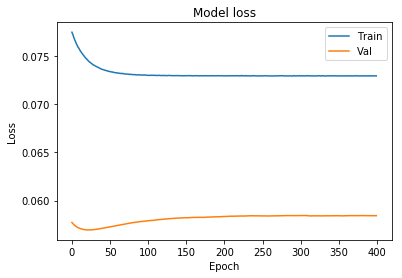

In [135]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [136]:
model = Sequential([
    Dense(28, activation='sigmoid', input_shape=(18,)),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
epochs=400
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])
#opt = model.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer='adam',
#model.compile(optimizer=opt,
model.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))

In [ ]:
model.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential

In [ ]:
#model = Sequential()
weights = model.get_weights()

In [ ]:
print(weights)

In [ ]:
model.summary()

In [ ]:
Xnew = [[2002, 1.9, 1], [2012, 2, 1], [2015, 2, 4]]
Xnew = [2002, 1.9, 1]
Xnew

In [139]:
df_t = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T2')
df_t.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,SEA CH,5,NOC,2,1,4350,EPC,259,0.400000,...,40000.000000,1,2,FPSO,30,1,1.000000,1,0.471042,0.25
1,Petrojarl Varg,NE,1,OC,1,1,2240,EPC,816,0.460000,...,65833.333333,2,2,FPSO,84,1,0.865823,2,0.286765,0.24
2,Stybarrow Venture MV16,AUST/NZ,3,IOC,1,3,5922,EPC,702,0.598425,...,87500.000000,2,3,FPSO,825,2,0.914286,4,-0.143875,0.27
3,Alima FPU,AFRICA,2,IOC,2,1,5720,EPC,994,1.133000,...,100000.000000,3,1,BARGE,600,3,0.900000,4,-0.022133,0.35
4,Jangkrik,SEA,4,OC,2,1,8824,EPC,1052,2.676500,...,79400.000000,2,2,BARGE,120,2,0.055416,3,0.114068,0.17


In [140]:
df_t= df_t.drop('Unit Name', axis = 1)
df_t= df_t.drop('Schedule_Overrun', axis = 1)
df_t= df_t.drop('Cost_Overrun', axis = 1)

In [141]:
df_t = pd.get_dummies(df_t)
dataset_t = df_t.values

# One-hot encode the data using pandas get_dummies

# Display the first 5 rows of the last 12 columns
#df.iloc[:,5:].head(5)
dataset_t

#Xnew = dataset_t[:,1:19]
#Xnew


array([[5., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 3., ..., 0., 0., 0.],
       ...,
       [3., 2., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.],
       [5., 2., 1., ..., 0., 0., 1.]])

In [142]:
dataset_t.shape

(106, 39)

In [148]:
Xnew = dataset_t[:,0:39]
Xnew

array([[5., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [3., 1., 3., ..., 0., 0., 0.],
       ...,
       [3., 2., 1., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 1.],
       [5., 2., 1., ..., 0., 0., 1.]])

In [149]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale = min_max_scaler.fit_transform(Xnew)

In [163]:

ynew2 = model2.predict(Xnew_scale)
print(Xnew_scale)
print(ynew2)

[[1.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.33333333 ... 0.         0.         0.        ]
 [0.5        0.         1.         ... 0.         0.         0.        ]
 ...
 [0.5        1.         0.33333333 ... 0.         0.         1.        ]
 [0.         1.         0.33333333 ... 0.         0.         1.        ]
 [1.         1.         0.33333333 ... 0.         0.         1.        ]]
[[4.98135984e-01]
 [2.67343700e-01]
 [2.89976716e-01]
 [3.51693064e-01]
 [1.67298794e-01]
 [3.47106248e-01]
 [1.15313321e-01]
 [1.90550983e-01]
 [1.32455677e-01]
 [1.18876725e-01]
 [3.31488550e-02]
 [3.10483873e-02]
 [8.43540251e-01]
 [4.27358687e-01]
 [5.14489412e-03]
 [9.03237164e-02]
 [2.84076989e-01]
 [9.69442129e-02]
 [5.14305651e-01]
 [3.58733237e-02]
 [5.46955347e-01]
 [1.80448979e-01]
 [3.34711373e-01]
 [2.75321603e-02]
 [8.16571414e-02]
 [4.55617666e-01]
 [7.60075152e-01]
 [4.13735092e-01]
 [5.80387831e-01]
 [1.13885701e-02]
 [2.19398141e-02

In [164]:
X_val_Sc = min_max_scaler.fit_transform(X_val)
ynew2_val = model2.predict(X_val_Sc)
print(X_val)
print(ynew2_val)

[[5.00000000e+00 2.00000000e+00 1.00000000e+00 7.21300000e+03
  1.38300000e+03 1.30000000e+00 1.45833333e+05 3.00000000e+00
  1.00000000e+00 1.17000000e+03 2.00000000e+00 9.60000000e-01
  2.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 2.00000000e+00 1.00000000e+00 7.81400000e+03
  2.22900000e+03 1.11600000e+01 1.48333333e+05 6.00000000e+00
  5.00000000e+00 2.50000000e+02 1.00000000e+00 2.35955056e-01
  5.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.000

In [152]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew2[%s] = %s " % (loop,Xnew[loop],loop,ynew2[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [5.00e+00 2.00e+00 1.00e+00 4.35e+03 2.59e+02 4.00e-01 4.00e+04 1.00e+00
 2.00e+00 3.00e+01 1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00], ynew2[0] = [0.49813598] 
Xnew[1] = [1.00000000e+00 1.00000000e+00 1.00000000e+00 2.24000000e+03
 8.16000000e+02 4.60000000e-01 6.58333333e+04 2.00000000e+00
 2.00000000e+00 8.40000000e+01 1.00000000e+00 8.65822785e-01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.000

In [153]:
print(ynew2)
# create excel writer
# write dataframe to excel sheet named 'marks'
writer = pd.ExcelWriter('predict_cost.xlsx')
ynew2_df = pd.DataFrame (ynew2)
ynew2_df.to_excel(writer, '18')
# save the excel file
writer.save()

[[4.98135984e-01]
 [2.67343700e-01]
 [2.89976716e-01]
 [3.51693064e-01]
 [1.67298794e-01]
 [3.47106248e-01]
 [1.15313321e-01]
 [1.90550983e-01]
 [1.32455677e-01]
 [1.18876725e-01]
 [3.31488550e-02]
 [3.10483873e-02]
 [8.43540251e-01]
 [4.27358687e-01]
 [5.14489412e-03]
 [9.03237164e-02]
 [2.84076989e-01]
 [9.69442129e-02]
 [5.14305651e-01]
 [3.58733237e-02]
 [5.46955347e-01]
 [1.80448979e-01]
 [3.34711373e-01]
 [2.75321603e-02]
 [8.16571414e-02]
 [4.55617666e-01]
 [7.60075152e-01]
 [4.13735092e-01]
 [5.80387831e-01]
 [1.13885701e-02]
 [2.19398141e-02]
 [2.92165995e-01]
 [2.87588418e-01]
 [7.91539669e-01]
 [9.56588387e-01]
 [1.30011439e-02]
 [3.26195180e-01]
 [2.32527018e-01]
 [3.40689063e-01]
 [4.00310218e-01]
 [6.40713632e-01]
 [9.25209761e-01]
 [4.27332044e-01]
 [6.19471908e-01]
 [7.29242325e-01]
 [1.94126070e-02]
 [2.13450938e-01]
 [2.97743618e-01]
 [7.91573822e-02]
 [2.12880433e-01]
 [1.24448836e-02]
 [3.77374887e-02]
 [4.27418381e-01]
 [8.37879479e-01]
 [4.03886259e-01]
 [8.757185

In [154]:
ynew3 = model3.predict(Xnew_scale)

In [155]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew3[%s] = %s " % (loop,Xnew[loop],loop,ynew3[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [5.00e+00 2.00e+00 1.00e+00 4.35e+03 2.59e+02 4.00e-01 4.00e+04 1.00e+00
 2.00e+00 3.00e+01 1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00], ynew3[0] = [0.24084556] 
Xnew[1] = [1.00000000e+00 1.00000000e+00 1.00000000e+00 2.24000000e+03
 8.16000000e+02 4.60000000e-01 6.58333333e+04 2.00000000e+00
 2.00000000e+00 8.40000000e+01 1.00000000e+00 8.65822785e-01
 2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.000

In [156]:
print(ynew3)

[[0.24084556]
 [0.24151206]
 [0.24106419]
 [0.2414935 ]
 [0.24145448]
 [0.24136871]
 [0.24153474]
 [0.24154943]
 [0.24138138]
 [0.24152964]
 [0.24137533]
 [0.24139026]
 [0.24153018]
 [0.24161425]
 [0.24180374]
 [0.24142292]
 [0.24157286]
 [0.24179643]
 [0.2414613 ]
 [0.2415317 ]
 [0.24146214]
 [0.24152061]
 [0.24138382]
 [0.24157685]
 [0.24146527]
 [0.24121234]
 [0.24141648]
 [0.24143049]
 [0.24125853]
 [0.24093252]
 [0.2409598 ]
 [0.24068132]
 [0.24111843]
 [0.24099132]
 [0.24115172]
 [0.24101058]
 [0.24197462]
 [0.24188584]
 [0.2419317 ]
 [0.24205527]
 [0.241557  ]
 [0.24173018]
 [0.24142855]
 [0.2418532 ]
 [0.24145627]
 [0.24174029]
 [0.24153328]
 [0.24159956]
 [0.24163473]
 [0.2415325 ]
 [0.24111447]
 [0.24116698]
 [0.2411429 ]
 [0.24104959]
 [0.24123538]
 [0.24144456]
 [0.24153996]
 [0.24166438]
 [0.24152243]
 [0.24137864]
 [0.24135923]
 [0.2410028 ]
 [0.24176112]
 [0.240978  ]
 [0.24078864]
 [0.24079227]
 [0.24168757]
 [0.24190357]
 [0.24148339]
 [0.2417382 ]
 [0.24166304]
 [0.24

In [158]:
Cost_Pred3 = pd.DataFrame(ynew2)
Cost_Pred3['18-2'] = pd.DataFrame(ynew3)

df_t = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T2')


Cost_Pred3['actual'] = df_t['Cost_Overrun']

Cost_Pred3['Name'] = df_t['Unit Name']
print(Cost_Pred3)

            0      18-2    actual                    Name
0    0.498136  0.240846  0.250000          Bohai Ming Zhu
1    0.267344  0.241512  0.240000          Petrojarl Varg
2    0.289977  0.241064  0.270000  Stybarrow Venture MV16
3    0.351693  0.241493  0.350000               Alima FPU
4    0.167299  0.241454  0.170000                Jangkrik
..        ...       ...       ...                     ...
101  0.013902  0.241986  0.043448                Ursa TLP
102  0.009387  0.241867  0.000000          Ram Powell TLP
103  0.382621  0.241817  0.375000                Big Foot
104  0.066029  0.242172  0.076923             Heidrun TLP
105  0.080538  0.241259  0.077973             Malikai TLP

[106 rows x 4 columns]


In [159]:
Cost_Pred3.to_excel("Cost_Pred3.xlsx")

In [ ]:
dataset

11 Features:
Region
Local Content
Lease/ Own
Planned_Cost
Hull Type
Technology Novelty
Type Unit
Water_Depth 
Lessons Learned
Oil/Gas
FEED Detail

Use only Region, Water Depth, Technology Novelty, and Lessons Learned

In [ ]:
#Reduce features as per pearson correlation
#X = dataset[:,[1, 2, 4, 9, 10, 13, 14, 15, 16, 17, 18]]
X = dataset[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]

print(X.shape)

In [ ]:
X

In [ ]:
Y = dataset[:,17]

In [ ]:
Y

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

In [ ]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [ ]:
Y

In [ ]:
for train, test in kfold.split(X_scale, Y):
# create model
	model4 = Sequential()
	model4.add(Dense(13, input_dim=13, activation='sigmoid'))
	model4.add(Dense(26, activation='sigmoid'))
	model4.add(Dense(8, activation='sigmoid'))
	model4.add(Dense(1, activation='sigmoid'))
	# Compile model
	model4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model4.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model4.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model5 = Sequential([
        Dense(26, activation='sigmoid', input_shape=(13,)),
        Dense(13, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model5.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model5.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model5.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

In [ ]:
model4.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df_t2 = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T1')
df_t2.head()

In [ ]:
dataset_t2 = df_t2.values
Xnew2 = dataset_t2[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]
print(Xnew2.shape)
print(Xnew2)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew2)

In [ ]:
ynew4 = model4.predict(Xnew_scale2)
ynew5 = model5.predict(Xnew_scale2)

In [ ]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew4[loop]))

In [ ]:
print(ynew4)

7 Features:
Region
Local Content
Lease/ Own
Technology Novelty
Type Unit
Lessons Learned
FEED Detail

In [ ]:
#Reduce features further as per pearson correlation
X = dataset[:,[1, 2, 12, 13, 14, 16, 18]]

In [ ]:
Y = dataset[:,19]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [ ]:
for train, test in kfold.split(X_scale, Y):
# create model
	model6 = Sequential()
	model6.add(Dense(12, input_dim=7, activation='relu'))
	model6.add(Dense(8, activation='relu'))
	model6.add(Dense(1, activation='sigmoid'))
	# Compile model
	model6.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model6.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model6.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model7 = Sequential([
        Dense(14, activation='sigmoid', input_shape=(7,)),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model7.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model7.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model7.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

In [ ]:
model6.evaluate(X_test, Y_test)[1]

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df_t3 = pd.read_excel(open('Cost_Sch-data-v2.xlsx', 'rb'), sheet_name='Cost_T1')
df_t3.head()

In [ ]:
dataset_t3 = df_t3.values
Xnew3 = dataset_t3[:,[1, 2, 4, 13, 14, 16, 18]]
Xnew3

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew3)

In [ ]:
ynew6 = model6.predict(Xnew_scale2)
ynew7 = model7.predict(Xnew_scale2)

In [ ]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew5[loop]))

In [ ]:
print(ynew6)

In [ ]:
print(type(ynew5))
print(ynew5.shape)
#print(range(ynew5))

#Cost_Pred3 = pd.DataFrame
Sch_Pred3 = pd.DataFrame(ynew1)
Sch_Pred3['18-2'] = pd.DataFrame(ynew3)
Sch_Pred3['13-1'] = pd.DataFrame(ynew4)
Sch_Pred3['13-2'] = pd.DataFrame(ynew5)
Sch_Pred3['7-1'] = pd.DataFrame(ynew6)
Sch_Pred3['7-2'] = pd.DataFrame(ynew7)
Sch_Pred3['actual'] = dataset_t[:,20]

Sch_Pred3['Name'] = df['Unit Name']
print(Sch_Pred3)

In [ ]:
Sch_Pred3.to_excel("Sch_Pred3.xlsx")